In [199]:
# Packages & Imports
import networkx as nx
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 

In [200]:
#systemic lupus erythematosus (SLE)
protein_list = ['UBC', 'RPS6', 'RPS18', 'RPS10', 'RPLP2', 'RPL7',
                'RPL6','RPL5', 'ISG15', 'IFS16', 'HSPA8', 'HSP90AA1']
proteins = "%0d".join(protein_list)

In [201]:
url = 'https://string-db.org/api/tsv/network?identifiers=' + proteins + '&species=9606'
r=requests.get(url)

In [202]:
lines = r.text.split('\n')
# The text should be extracted from the response object and divided into new lines.
data = [l.split('\t') for l in lines] 
df = pd.DataFrame(data[1:-1], columns = data[0]) 
interactions = df[['preferredName_A', 'preferredName_B', 'score']]
# Interaction score between each pair of proteins 


In [203]:
df.head() # returns the top 5 rows of the data frame

,stringId_A,stringId_B,preferredName_A,preferredName_B,ncbiTaxonId,score,nscore,fscore,pscore,ascore,escore,dscore,tscore
0,9606.ENSP00000322419,9606.ENSP00000441543,RPLP2,UBC,9606,0.509,0,0,0,0.267,0.254,0,0.174
1,9606.ENSP00000322419,9606.ENSP00000441543,RPLP2,UBC,9606,0.509,0,0,0,0.267,0.254,0,0.174
2,9606.ENSP00000322419,9606.ENSP00000335153,RPLP2,HSP90AA1,9606,0.574,0,0,0,0.338,0.239,0,0.223
3,9606.ENSP00000322419,9606.ENSP00000335153,RPLP2,HSP90AA1,9606,0.574,0,0,0,0.338,0.239,0,0.223
4,9606.ENSP00000322419,9606.ENSP00000432083,RPLP2,HSPA8,9606,0.611,0,0,0,0.531,0.071,0,0.18


In [204]:
df.keys() # returns a view object that displays a list of all the keys in the dictionary in order of insertion 

Index(['stringId_A', 'stringId_B', 'preferredName_A', 'preferredName_B',
       'ncbiTaxonId', 'score', 'nscore', 'fscore', 'pscore', 'ascore',
       'escore', 'dscore', 'tscore'],
      dtype='object')

In [205]:
G = nx.Graph(name = 'Protein-Protein Interaction Graph')
interactions = np.array(interactions)
for i in range(len(interactions)):
    interaction=interactions[i]
    a = interaction[0] # protein node a
    b = interaction[1] # protein node b
    w = float(interaction[2]) # weight of edge as interaction score between 'a' & 'b'
    # high scores = low weight (consideration)
    G.add_weighted_edges_from([(a,b,w)])
    print([a,b,w])

['RPLP2', 'UBC', 0.509]
['RPLP2', 'UBC', 0.509]
['RPLP2', 'HSP90AA1', 0.574]
['RPLP2', 'HSP90AA1', 0.574]
['RPLP2', 'HSPA8', 0.611]
['RPLP2', 'HSPA8', 0.611]
['RPLP2', 'RPL5', 0.999]
['RPLP2', 'RPL5', 0.999]
['RPLP2', 'RPS6', 0.999]
['RPLP2', 'RPS6', 0.999]
['RPLP2', 'RPL6', 0.999]
['RPLP2', 'RPL6', 0.999]
['RPLP2', 'RPL7', 0.999]
['RPLP2', 'RPL7', 0.999]
['RPLP2', 'RPS10', 0.999]
['RPLP2', 'RPS10', 0.999]
['RPLP2', 'RPS18', 0.999]
['RPLP2', 'RPS18', 0.999]
['HSP90AA1', 'RPS10', 0.405]
['HSP90AA1', 'RPS10', 0.405]
['HSP90AA1', 'RPS18', 0.413]
['HSP90AA1', 'RPS18', 0.413]
['HSP90AA1', 'ISG15', 0.421]
['HSP90AA1', 'ISG15', 0.421]
['HSP90AA1', 'RPL7', 0.491]
['HSP90AA1', 'RPL7', 0.491]
['HSP90AA1', 'RPL5', 0.607]
['HSP90AA1', 'RPL5', 0.607]
['HSP90AA1', 'RPL6', 0.648]
['HSP90AA1', 'RPL6', 0.648]
['HSP90AA1', 'RPS6', 0.692]
['HSP90AA1', 'RPS6', 0.692]
['HSP90AA1', 'UBC', 0.79]
['HSP90AA1', 'UBC', 0.79]
['HSP90AA1', 'HSPA8', 0.999]
['HSP90AA1', 'HSPA8', 0.999]
['RPL7', 'UBC', 0.46]
['RPL7',

In [206]:
nx.info(G)

<ipython-input-206-ed9cf5bce324>:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


"Graph named 'Protein-Protein Interaction Graph' with 11 nodes and 52 edges"

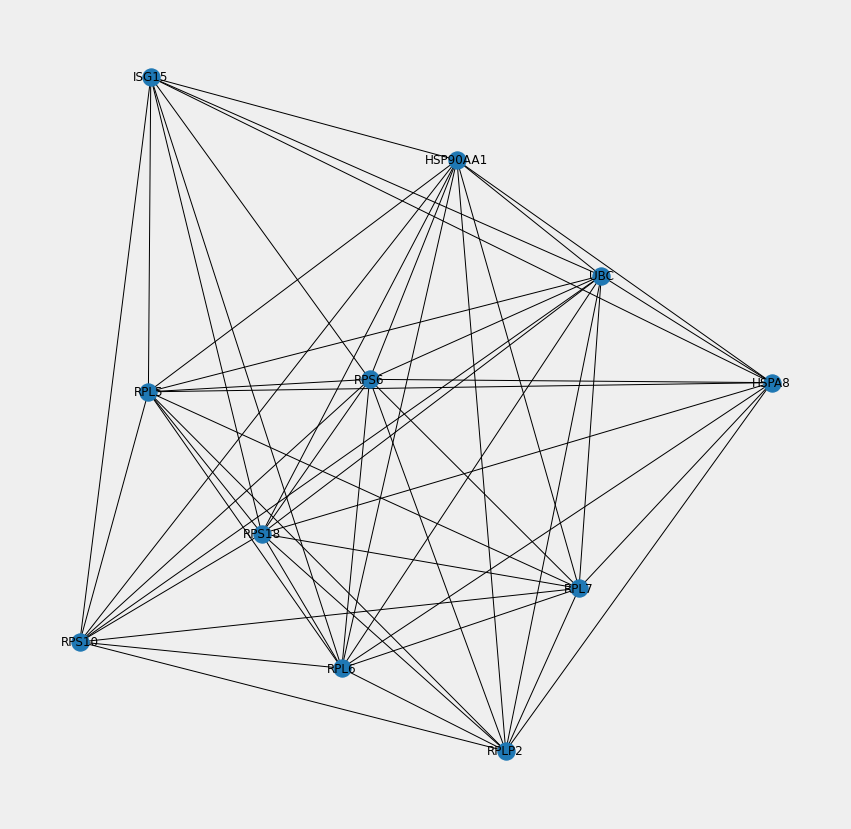

In [207]:
pos = nx.random_layout(G)
plt.figure(figsize = (15,15),facecolor = [0.4,0.4,0.4,0.1])
nx.draw_networkx(G)
plt.axis('off')
plt.show()

In [208]:
nx.degree(G)

DegreeView({'RPLP2': 9, 'UBC': 10, 'HSP90AA1': 10, 'HSPA8': 9, 'RPL5': 10, 'RPS6': 10, 'RPL6': 10, 'RPL7': 9, 'RPS10': 9, 'RPS18': 10, 'ISG15': 8})

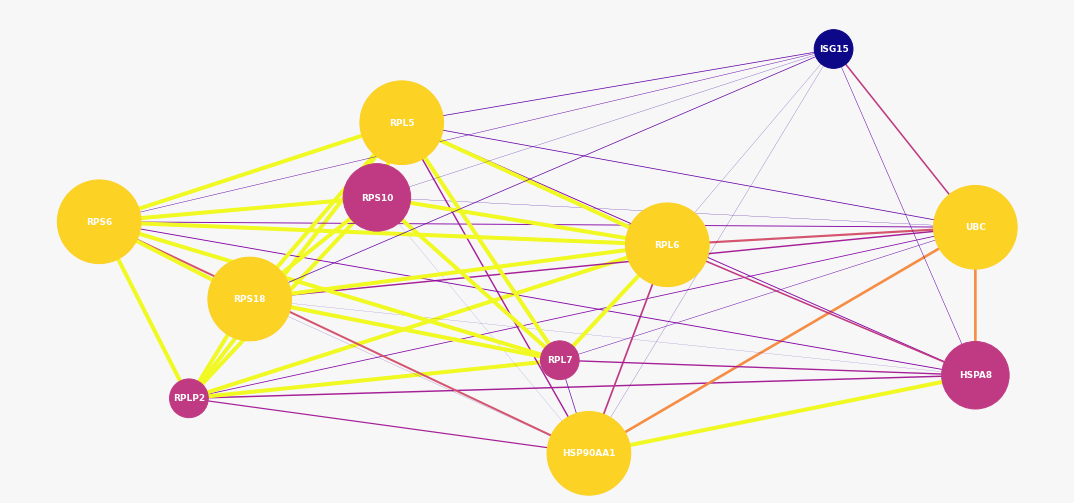

In [209]:
def rescale(l,newmin,newmax):
    arr = list(l)
    return [(x-min(arr))/(max(arr)-min(arr))*(newmax-newmin)+newmin for x in arr]
graph_colormap = cm.get_cmap('plasma',12)
c = rescale([G.degree(v) for v in G],0.0,0.9)
c = [graph_colormap(i) for i in c]
bc = nx.betweenness_centrality(G)
s = rescale([v for v in bc.values()],1500,7000)
ew = rescale([float(G[u][v]['weight']) for u,v in G.edges],0.1,4)
ec = rescale([float(G[u][v]['weight']) for u,v in G.edges],0.1,1)
ec = [graph_colormap(i) for i in ec]

pos=nx.spring_layout(G)
plt.figure(figsize = (19,9),facecolor = [0.7,0.7,0.7,0.1])
nx.draw_networkx(G, pos=pos, with_labels=True, node_color=c, node_size=s, 
                 edge_color=ec, width=ew, font_color='white', 
                 font_weight='bold', font_size='9')
plt.axis('off')
plt.show()

In [210]:
 def Dictionaryprint(d):
        k = list(d.keys())
        v = list(d.values())
        for i in range(len(d)):
            print(k[i],"\t",v[i])

In [211]:
between = nx.betweenness_centrality(G)
close = nx.closeness_centrality(G)
eigen = nx.eigenvector_centrality(G)
nx.set_node_attributes(G,0.1,'percolation')
percolation = nx.percolation_centrality(G)

In [212]:
print(f"Betweenness Centrality:",Dictionaryprint(between))

RPLP2 	 0.0024691358024691358
UBC 	 0.008024691358024692
HSP90AA1 	 0.008024691358024692
HSPA8 	 0.005555555555555556
RPL5 	 0.008024691358024692
RPS6 	 0.008024691358024692
RPL6 	 0.008024691358024692
RPL7 	 0.0024691358024691358
RPS10 	 0.005555555555555556
RPS18 	 0.008024691358024692
ISG15 	 0.0024691358024691358
Betweenness Centrality: None


In [213]:
print(f"Closeness Centrality:",Dictionaryprint(close))

RPLP2 	 0.9090909090909091
UBC 	 1.0
HSP90AA1 	 1.0
HSPA8 	 0.9090909090909091
RPL5 	 1.0
RPS6 	 1.0
RPL6 	 1.0
RPL7 	 0.9090909090909091
RPS10 	 0.9090909090909091
RPS18 	 1.0
ISG15 	 0.8333333333333334
Closeness Centrality: None


In [214]:
print(f"Percolation Centrality:",Dictionaryprint(percolation))

RPLP2 	 0.002469135802469136
UBC 	 0.008024691358024694
HSP90AA1 	 0.008024691358024694
HSPA8 	 0.005555555555555557
RPL5 	 0.008024691358024694
RPS6 	 0.008024691358024694
RPL6 	 0.008024691358024694
RPL7 	 0.002469135802469136
RPS10 	 0.005555555555555557
RPS18 	 0.008024691358024694
ISG15 	 0.002469135802469136
Percolation Centrality: None


In [215]:
print(f"Eigenvector Centrality:",Dictionaryprint(eigen))

RPLP2 	 0.29073361166537925
UBC 	 0.3155218173035413
HSP90AA1 	 0.3155218173035413
HSPA8 	 0.28806896497187146
RPL5 	 0.3155218173035413
RPS6 	 0.3155218173035413
RPL6 	 0.3155218173035413
RPL7 	 0.29073361166537925
RPS10 	 0.28806896497187146
RPS18 	 0.3155218173035413
ISG15 	 0.2601083885016068
Eigenvector Centrality: None


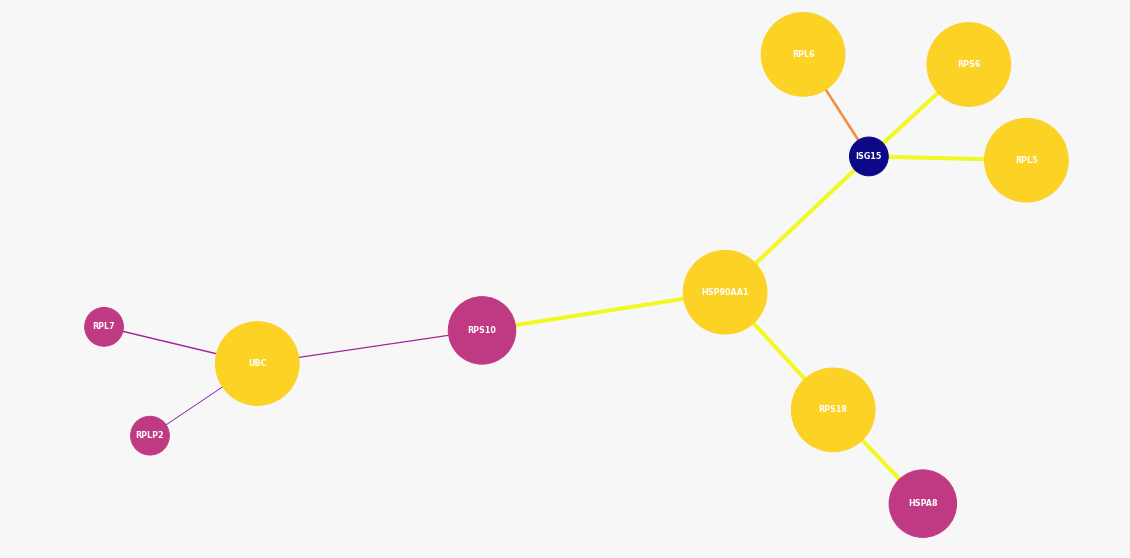

In [216]:
T = nx.minimum_spanning_tree(G)
pos = nx.spring_layout(T)
plt.figure(figsize=(20,10),facecolor=[0.7,0.7,0.7,0.1])
nx.draw_networkx(T, pos=pos, with_labels=True, node_color=c, 
                node_size=s, edge_color=ec, width=ew, font_color='white', 
                 font_weight='bold', font_size='8')
plt.axis('off')
plt.show()